In [453]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import Henning_cleaning_functions_update as hcf
from matplotlib.ticker import FuncFormatter
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
from scipy import stats


%matplotlib inline

In [454]:
df_pt1 = pd.read_csv('df_final_web_data_pt_1.txt')
df_pt2 = pd.read_csv('df_final_web_data_pt_2.txt')
df_experi = pd.read_csv('df_final_experiment_clients.txt')
df_demo = pd.read_csv('df_final_demo.txt')


pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns', 90)



In [455]:
df_pt1.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [456]:
df_pt2.isnull().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [457]:
# combine original 3 data files: df_pt1 + df_pt2 + final_experiment 
df_12 = pd.concat([df_pt1,df_pt2],ignore_index=True)
df_12

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [458]:
df_experi

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [459]:
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.00,73.00,60.50,U,2.00,45105.30,6.00,9.00
1,2304905,7.00,94.00,58.00,U,2.00,110860.30,6.00,9.00
2,1439522,5.00,64.00,32.00,U,2.00,52467.79,6.00,9.00
3,1562045,16.00,198.00,49.00,M,2.00,67454.65,3.00,6.00
4,5126305,12.00,145.00,33.00,F,2.00,103671.75,0.00,3.00
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.00,56.00,38.50,U,3.00,1411062.68,5.00,5.00
70605,8981690,12.00,148.00,31.00,M,2.00,101867.07,6.00,6.00
70606,333913,16.00,198.00,61.50,F,2.00,40745.00,3.00,3.00
70607,1573142,21.00,255.00,68.00,M,3.00,475114.69,4.00,4.00


In [460]:
hcf.strip_replace_ws (df_demo)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.00,73.00,60.50,U,2.00,45105.30,6.00,9.00
1,2304905,7.00,94.00,58.00,U,2.00,110860.30,6.00,9.00
2,1439522,5.00,64.00,32.00,U,2.00,52467.79,6.00,9.00
3,1562045,16.00,198.00,49.00,M,2.00,67454.65,3.00,6.00
4,5126305,12.00,145.00,33.00,F,2.00,103671.75,0.00,3.00
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.00,56.00,38.50,U,3.00,1411062.68,5.00,5.00
70605,8981690,12.00,148.00,31.00,M,2.00,101867.07,6.00,6.00
70606,333913,16.00,198.00,61.50,F,2.00,40745.00,3.00,3.00
70607,1573142,21.00,255.00,68.00,M,3.00,475114.69,4.00,4.00


In [461]:
df_demo.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [462]:
# drop null values
df_demo = df_demo.dropna()

In [463]:
df_demo.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [464]:
#rename and homogenize column names
column_replacements = {"gendr":"gender", "bal":"acct_balance", "clnt_tenure_yr":"tenure_years","clnt_tenure_mnth":"tenure_months","clnt_age":"age"}
hcf.rename_columns (df_demo, column_replacements)

C:\Users\JimiH\IRON HACK\WEEK 5\vanguard-ab-test-backup\Henning_cleaning_functions_update.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=column_replacements, inplace=True)


,client_id,tenure_years,tenure_months,age,gender,num_accts,acct_balance,calls_6_mnth,logons_6_mnth
0,836976,6.00,73.00,60.50,U,2.00,45105.30,6.00,9.00
1,2304905,7.00,94.00,58.00,U,2.00,110860.30,6.00,9.00
2,1439522,5.00,64.00,32.00,U,2.00,52467.79,6.00,9.00
3,1562045,16.00,198.00,49.00,M,2.00,67454.65,3.00,6.00
4,5126305,12.00,145.00,33.00,F,2.00,103671.75,0.00,3.00
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.00,56.00,38.50,U,3.00,1411062.68,5.00,5.00
70605,8981690,12.00,148.00,31.00,M,2.00,101867.07,6.00,6.00
70606,333913,16.00,198.00,61.50,F,2.00,40745.00,3.00,3.00
70607,1573142,21.00,255.00,68.00,M,3.00,475114.69,4.00,4.00


In [465]:
#recasting whole number columns to integer
hcf.recast(df_demo, 'tenure_years','tenure_months','num_accts','calls_6_mnth','logons_6_mnth','age')

C:\Users\JimiH\IRON HACK\WEEK 5\vanguard-ab-test-backup\Henning_cleaning_functions_update.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
C:\Users\JimiH\IRON HACK\WEEK 5\vanguard-ab-test-backup\Henning_cleaning_functions_update.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].round(0).astype('Int64')


,client_id,tenure_years,tenure_months,age,gender,num_accts,acct_balance,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2,45105.30,6,9
1,2304905,7,94,58,U,2,110860.30,6,9
2,1439522,5,64,32,U,2,52467.79,6,9
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,U,3,1411062.68,5,5
70605,8981690,12,148,31,M,2,101867.07,6,6
70606,333913,16,198,62,F,2,40745.00,3,3
70607,1573142,21,255,68,M,3,475114.69,4,4


In [466]:
df_demo['gender'].value_counts()

gender
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

In [467]:
#merging and renaming Unknown gender rows
df_demo['gender'] = df_demo['gender'].replace({"X":"Unknown","U":"Unknown"})
df_demo['gender'].value_counts()

C:\Users\JimiH\AppData\Local\Temp\ipykernel_16376\3270668142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['gender'] = df_demo['gender'].replace({"X":"Unknown","U":"Unknown"})


gender
Unknown    24125
M          23724
F          22745
Name: count, dtype: int64

In [468]:
#analysing the age ditribution of the clients
print(df_demo['age'].describe())
print() 
print(f"The mode of client age:\n{df_demo['age'].mode()}")

count   70594.00
mean       46.45
std        15.59
min        14.00
25%        32.00
50%        47.00
75%        59.00
max        96.00
Name: age, dtype: Float64

The mode of client age:
0    58
Name: age, dtype: Int64


<Axes: xlabel='age', ylabel='Count'>

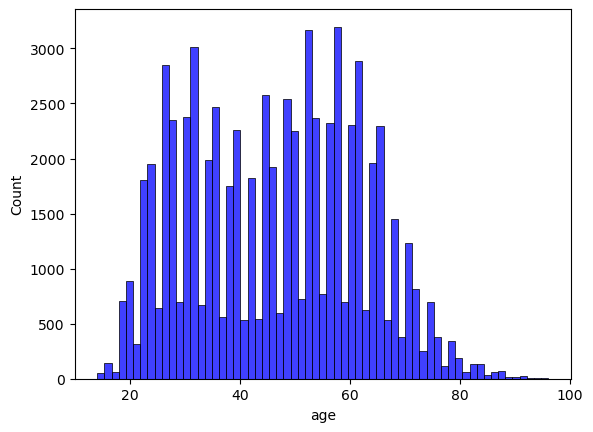

In [469]:
sns.histplot(df_demo['age'], kde=False, color='blue')

C:\Users\JimiH\AppData\Local\Temp\ipykernel_16376\2062295292.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['age_binned'] = pd.cut(df_demo['age'], bins=range(0, 101, 5), labels=bin_labels, right=False, ordered=True)


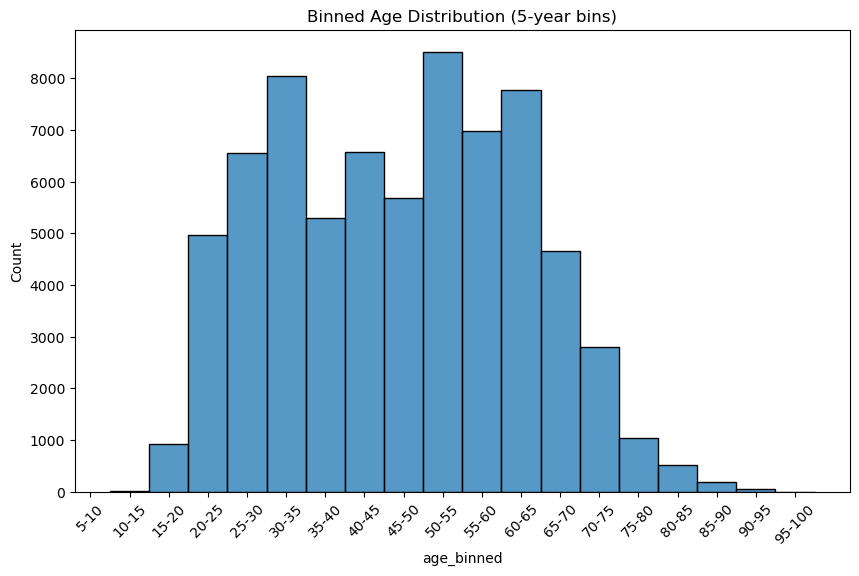

In [470]:
#very strange age distribution, binning to smooth out the effect!

# Creating age bins:
bin_labels = [f'{i}-{i+5}' for i in range(0, 100, 5)]
df_demo['age_binned'] = pd.cut(df_demo['age'], bins=range(0, 101, 5), labels=bin_labels, right=False, ordered=True)

# Plot the binned data,sorted
plt.figure(figsize=(10, 6))
sns.histplot(df_demo['age_binned'], discrete=True, kde=False)
plt.xticks(rotation=45)
plt.title("Binned Age Distribution (5-year bins)")
plt.show()


As we can see, we have a bimodal distribution with most clients being either between 30-35 or 50-55 years old, with the mean and median being both around 47 years meaning most clients tend to be above middle age.

<Axes: ylabel='count'>

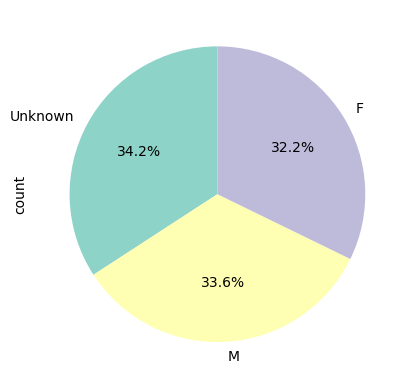

In [472]:
#visualising the gender distribution of the clients
df_demo['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

As we can see, we have a relatively even gender distribution between male, female and unknown, each about a third of the clients.

In [474]:
#analysing the tenure of clients
print(df_demo['tenure_years'].describe())
print() 
print(f"The mode of tenure years:\n{df_demo['tenure_years'].mode()}")

count   70594.00
mean       12.05
std         6.87
min         2.00
25%         6.00
50%        11.00
75%        16.00
max        62.00
Name: tenure_years, dtype: Float64

The mode of tenure years:
0    6
Name: tenure_years, dtype: Int64


<Axes: xlabel='tenure_years', ylabel='Count'>

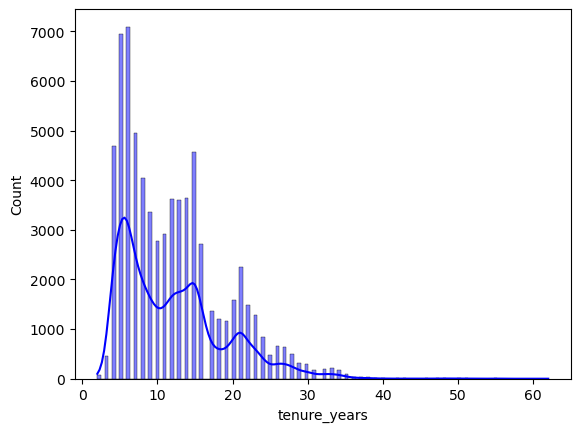

In [475]:
sns.histplot(df_demo['tenure_years'], kde=True, color='blue')

As we can see, most users tend to have been clients for around 6 years, with the tenure mean at 12 and the median at 11 years meaning over 50% longstanding users with more than 11 years tenure.

In [477]:
#analysing the amount of money in customer accounts
pd.options.display.float_format = '{:.4f}'.format
df_demo["acct_balance"].describe()

count      70594.0000
mean      147446.7265
std       301510.5836
min        13789.4200
25%        37346.5975
50%        63334.5900
75%       137546.1175
max     16320040.1500
Name: acct_balance, dtype: float64

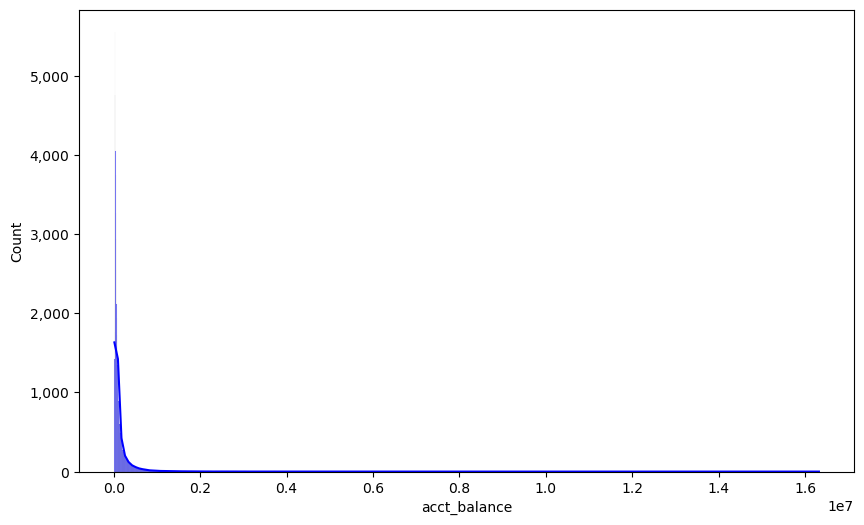

In [478]:
# Assuming df is your DataFrame and it contains a 'price' column
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(df_demo['acct_balance'], kde=True, color='blue')

# Format y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

In [479]:
df_demo.sort_values(by='acct_balance',ascending = False)

,client_id,tenure_years,tenure_months,age,gender,num_accts,acct_balance,calls_6_mnth,logons_6_mnth,age_binned
39367,9286288,21,254,62,M,3,16320040.1500,6,9,60-65
63746,8339240,6,80,26,M,2,12838418.0100,3,3,25-30
23849,7070097,11,133,53,M,2,8986419.7700,6,9,50-55
13318,9440656,7,94,63,F,2,8292996.2100,6,9,60-65
2171,2291985,7,85,41,M,2,8247729.9700,1,4,40-45
...,...,...,...,...,...,...,...,...,...,...
53141,2210130,8,105,18,M,2,13793.6900,3,3,15-20
66292,9862353,17,205,59,M,2,13792.9800,7,7,55-60
61826,3280109,15,185,59,F,2,13791.8000,7,7,55-60
55126,989035,15,184,41,M,2,13791.3400,1,1,40-45


<Axes: ylabel='acct_balance'>

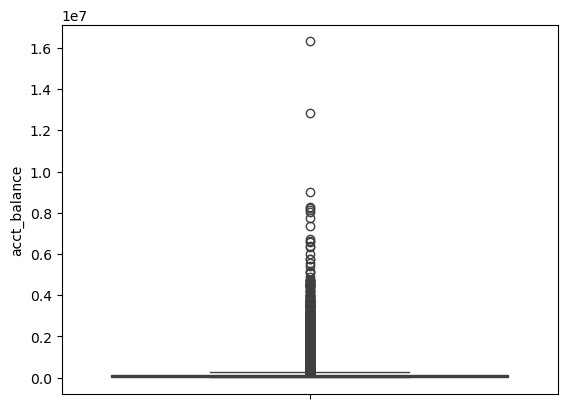

In [480]:
sns.boxplot(data = df_demo['acct_balance'])

In [481]:
#removing massive outliers
df_acct_no_outlier = df_demo[(df_demo['acct_balance'] <= df_demo['acct_balance'].quantile(0.95))]

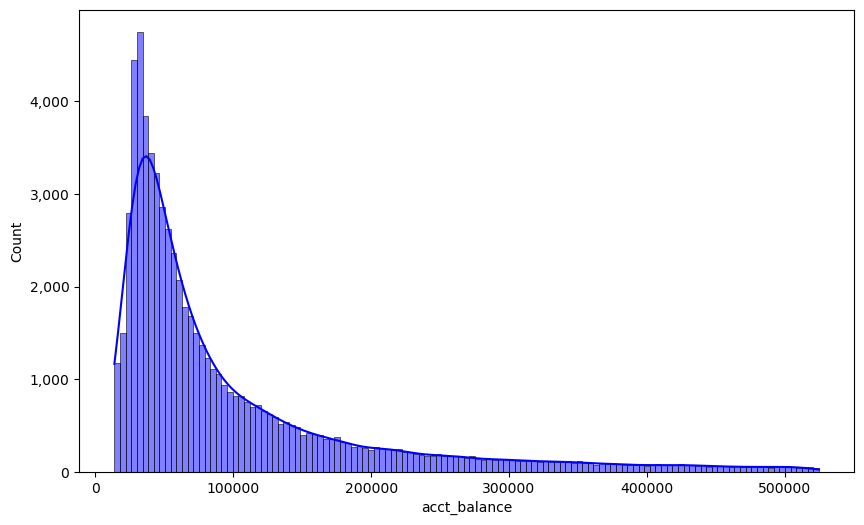

In [482]:
plt.figure(figsize=(10, 6))

sns.histplot(df_acct_no_outlier['acct_balance'], kde=True, color='blue')

# Format y-axis to avoid scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

In [483]:
#analysing account balance by gender
df_demo.groupby("gender").agg({"acct_balance":["mean", "median","max","min","std"]}).reset_index()

gender acct_balance                                                
                   mean     median           max        min         std
0        F  135565.4224 69028.9000  8292996.2100 13789.4200 240108.2999
1        M  212299.8681 85759.6750 16320040.1500 13791.3400 426402.8281
2  Unknown   94873.2273 49128.4000  4862430.0400 13793.8300 160740.2327

C:\Users\JimiH\AppData\Local\Temp\ipykernel_16376\1329260103.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_demo, x='gender', y='acct_balance', palette="coolwarm")


<Axes: xlabel='gender', ylabel='acct_balance'>

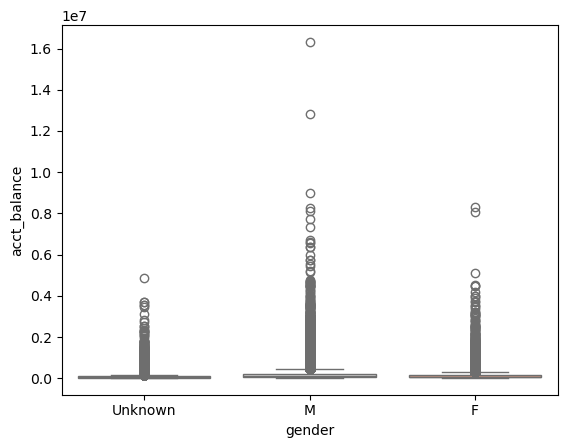

In [484]:
sns.boxplot(data=df_demo, x='gender', y='acct_balance', palette="coolwarm")

C:\Users\JimiH\AppData\Local\Temp\ipykernel_16376\1734377233.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_acct_no_outlier, x='gender', y='acct_balance', palette="coolwarm")


<Axes: xlabel='gender', ylabel='acct_balance'>

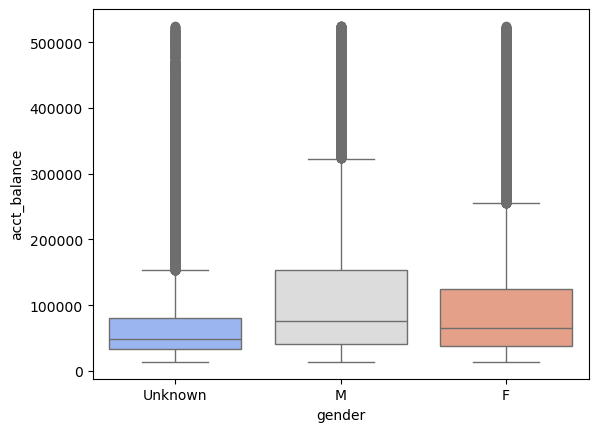

In [485]:
sns.boxplot(data=df_acct_no_outlier, x='gender', y='acct_balance', palette="coolwarm")

In [486]:
df_acct_no_outlier.groupby("gender").agg({"acct_balance":["mean", "median","max","min","std"]}).reset_index()

gender acct_balance                                              
                   mean     median         max        min         std
0        F  101043.1250 66104.3900 524381.0400 13789.4200  94350.9397
1        M  119291.2828 75553.3650 524769.1500 13791.3400 111375.2601
2  Unknown   77333.6584 48313.2450 524503.8600 13793.8300  80029.5013

As we can see, we have a heavily positively skewed distribution, we had to remove extreme outliers to get a readable visualisation. The mean sits at 147446 while the median is significantly lower at 63334. Gender-wise it seems relatively evenly distributed with men being a bit higher, after removing extreme outliers, which all belonged to men. People with unknown gender have a significantly lower mean and median.

C:\Users\JimiH\AppData\Local\Temp\ipykernel_16376\2636760146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_demo, x='gender', y='tenure_years', palette="coolwarm")


<Axes: xlabel='gender', ylabel='tenure_years'>

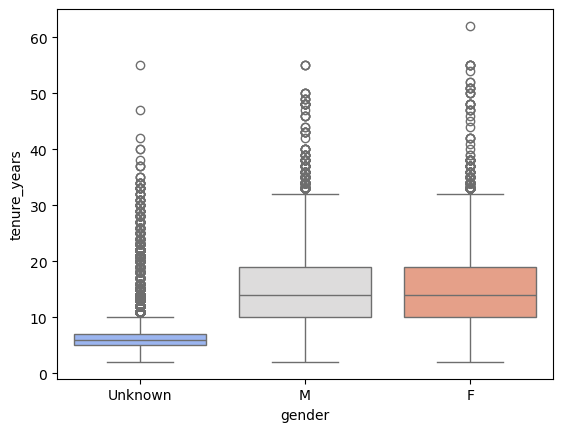

In [488]:
#analysing tenure by gender
sns.boxplot(data=df_demo, x='gender', y='tenure_years', palette="coolwarm")

In [489]:
df_demo.groupby("gender").agg({"tenure_years":["mean", "median","max","min","std"]}).reset_index()

gender tenure_years                       
                   mean  median max min    std
0        F      14.7928 14.0000  62   2 6.4555
1        M      14.8826 14.0000  55   2 6.4573
2  Unknown       6.6874  6.0000  55   2 3.7616

Men and women also appear to be similarly longstanding customers, while people with unknown gender tend to be relatively new customers. This makes sense considering that longstanding customers would have more interactions with the staff where at some point their gender would be stated.

In [491]:
#dropping rows that were not part of either the control or test group
df_experi_nonan = df_experi.dropna(subset=['Variation'])
df_experi_nonan.isnull().sum()


client_id    0
Variation    0
dtype: int64

In [492]:
#merging the experiment dataframes
df_merged_12_experi = pd.merge(df_12,df_experi_nonan, on='client_id',how='inner')


In [493]:
#showing duplicates
duplicates = df_merged_12_experi[df_merged_12_experi.duplicated(keep=False)]
duplicates

,client_id,visitor_id,visit_id,process_step,date_time,Variation
361,9358626,148475529_63668223960,223297395_36250329195_832161,start,2017-04-28 12:27:28,Control
362,9358626,148475529_63668223960,223297395_36250329195_832161,start,2017-04-28 12:27:28,Control
364,5376894,622509328_44408201172,688984457_43441834354_912755,start,2017-04-28 14:20:01,Test
365,5376894,622509328_44408201172,688984457_43441834354_912755,start,2017-04-28 14:20:01,Test
379,438567,923318467_50708963627,330543236_29863358529_771432,start,2017-04-28 02:52:29,Test
...,...,...,...,...,...,...
321274,1129748,27929904_9079935779,974922467_42594903952_165673,start,2017-05-08 20:22:19,Control
321275,1129748,27929904_9079935779,974922467_42594903952_165673,start,2017-05-08 20:20:59,Control
321276,1129748,27929904_9079935779,974922467_42594903952_165673,start,2017-05-08 20:20:59,Control
321298,7049106,710348688_12741653529,412278907_8949064401_171038,start,2017-05-20 23:07:09,Test


In [494]:
#dropping duplicates 
df_merged_unique = df_merged_12_experi.drop_duplicates(keep='first')

In [495]:
#merging experiment data with client data
df_merged_unique_demo = pd.merge(df_merged_unique,df_demo, on='client_id',how='inner')

In [496]:
df_merged_unique_demo.isnull().sum()


client_id        0
visitor_id       0
visit_id         0
process_step     0
date_time        0
Variation        0
tenure_years     0
tenure_months    0
age              0
gender           0
num_accts        0
acct_balance     0
calls_6_mnth     0
logons_6_mnth    0
age_binned       0
dtype: int64

In [497]:
#renaming
df_all = df_merged_unique_demo

In [498]:
df_all

,client_id,visitor_id,visit_id,process_step,date_time,Variation,tenure_years,tenure_months,age,gender,num_accts,acct_balance,calls_6_mnth,logons_6_mnth,age_binned
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79,Unknown,2,189023.8600,1,4,75-80
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79,Unknown,2,189023.8600,1,4,75-80
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79,Unknown,2,189023.8600,1,4,75-80
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79,Unknown,2,189023.8600,1,4,75-80
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79,Unknown,2,189023.8600,1,4,75-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317118,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10,121,55,Unknown,2,153238.8300,3,6,55-60
317119,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21,252,34,M,3,141808.0500,6,9,30-35
317120,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21,252,34,M,3,141808.0500,6,9,30-35
317121,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21,252,34,M,3,141808.0500,6,9,30-35


In [499]:
#dividing the dataframe into test and control dataframes
df_control = df_all[df_all['Variation'] == "Control"]
df_test = df_all[df_all['Variation'] == "Test"]
df_control = df_control.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [500]:
df_control

,client_id,visitor_id,visit_id,process_step,date_time,Variation,tenure_years,tenure_months,age,gender,num_accts,acct_balance,calls_6_mnth,logons_6_mnth,age_binned
0,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control,12,149,64,M,2,142642.2600,5,8,60-65
1,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control,12,149,64,M,2,142642.2600,5,8,60-65
2,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control,12,149,64,M,2,142642.2600,5,8,60-65
3,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control,12,149,64,M,2,142642.2600,5,8,60-65
4,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control,12,149,64,M,2,142642.2600,5,8,60-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140477,433098,5505424_50616523266,773565250_67577573147_389841,start,2017-05-13 15:30:47,Control,6,73,25,Unknown,2,34419.6200,2,5,25-30
140478,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21,252,34,M,3,141808.0500,6,9,30-35
140479,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21,252,34,M,3,141808.0500,6,9,30-35
140480,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21,252,34,M,3,141808.0500,6,9,30-35


In [501]:
df_test

,client_id,visitor_id,visit_id,process_step,date_time,Variation,tenure_years,tenure_months,age,gender,num_accts,acct_balance,calls_6_mnth,logons_6_mnth,age_binned
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79,Unknown,2,189023.8600,1,4,75-80
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79,Unknown,2,189023.8600,1,4,75-80
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79,Unknown,2,189023.8600,1,4,75-80
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79,Unknown,2,189023.8600,1,4,75-80
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79,Unknown,2,189023.8600,1,4,75-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176636,1574008,117364417_77840596075,528720790_71583064618_169151,confirm,2017-05-06 23:51:05,Test,10,121,55,Unknown,2,153238.8300,3,6,55-60
176637,1574008,117364417_77840596075,528720790_71583064618_169151,step_3,2017-05-06 23:50:40,Test,10,121,55,Unknown,2,153238.8300,3,6,55-60
176638,1574008,117364417_77840596075,528720790_71583064618_169151,step_2,2017-05-06 23:43:47,Test,10,121,55,Unknown,2,153238.8300,3,6,55-60
176639,1574008,117364417_77840596075,528720790_71583064618_169151,step_1,2017-05-06 23:43:34,Test,10,121,55,Unknown,2,153238.8300,3,6,55-60


In [502]:
# set all numbers display in normal format
pd.options.display.float_format ='{:,.4f}'.format
#df_expe.loc[df_expe['clnt_tenure_mnth']>12,'clnt_tenure_mnth']=df_expe['clnt_tenure_mnth'] % 12

## KPI

In [504]:
# Completion Rate for control and test group：

total_users_control =df_control['visit_id'].nunique()
cfm_user_control = df_control[df_control['process_step']=='confirm']['visit_id'].nunique()
completion_rate_control = round((cfm_user_control/total_users_control)*100,2)
print(f"completion rate for control group customer is:{completion_rate_control}%")

total_users_test =df_test['visit_id'].nunique()
cfm_user_test = df_test[df_test['process_step']=='confirm']['visit_id'].nunique()
completion_rate_test = round((cfm_user_test/total_users_control)*100,2)
print(f"completion rate for test group customer is: {completion_rate_test}%")


completion rate for control group customer is:49.84%
completion rate for test group customer is: 67.51%


The completion rate in the new design appears to be significantly higher than in the old design.

In [506]:
# Convert 'date_time' to datetime format
df_test['date_time'] = pd.to_datetime(df_test['date_time'])

# Step mapping
step_orde_dict ={0:'start',1:'step_1',2:'step_2',3:'step_3',4:'confirm'}
reverse_step_orde_dict = {value:key for key,value in step_orde_dict.items()}

df_test['date_time'] = pd.to_datetime(df_test['date_time'])

# Map the steps to their numeric order
df_test['step_order'] = df_test['process_step'].map(reverse_step_orde_dict)

# Sort the DataFrame by visit_id and date_time to ensure chronological order of actions
df_test = df_test.sort_values(by=['visit_id', 'date_time'])

df_test['errors'] = df_test.groupby('visit_id')['step_order'].diff() < 0

# Calculate the total number of errors (sum of all the errors across all visitors)
total_errors = df_test['errors'].sum()

# Calculate the total number of actions (each row is an action)
total_actions = df_test.shape[0]

# Calculate the error rate as the percentage of errors vs total actions
error_rate = round((total_errors / total_actions) * 100, 2)

# Output the total number of errors and the error rate
print(f"Total errors in test group: {total_errors}")
print(f"Error rate for test group: {error_rate}%")


Total errors in test group: 16288
Error rate for test group: 9.22%


In [507]:
# Convert 'date_time' to datetime format
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

# Step mapping
step_orde_dict = {0: 'start', 1: 'step_1', 2: 'step_2', 3: 'step_3', 4: 'confirm'}
reverse_step_orde_dict = {value: key for key, value in step_orde_dict.items()}

# Insert 'step_order' column based on the 'process_step'
df_control['step_order'] = df_control['process_step'].map(reverse_step_orde_dict)

# Sort the DataFrame by 'visit_id' and 'date_time'
df_control = df_control.sort_values(by=['visit_id', 'date_time'])

df_control['errors'] = df_control.groupby('visit_id')['step_order'].diff() < 0

# Calculate the total number of errors
total_errors = df_control['errors'].sum()

# Calculate the total number of actions (each row is an action)
total_actions = df_control.shape[0]

# Calculate the error rate as the percentage of errors vs total actions
error_rate = round((total_errors / total_actions) * 100, 2)

# Output the total number of errors and the error rate
print(f"Total errors in control group: {total_errors}")
print(f"Error rate for control group: {error_rate}%")


Total errors in control group: 9628
Error rate for control group: 6.85%


In [508]:
# Total errors and actions for control group
total_errors_control = df_control['errors'].sum()
total_actions_control = df_control.shape[0]

# Total errors and actions for test group
total_errors_test = df_test['errors'].sum()
total_actions_test = df_test.shape[0]

# Number of errors and total actions for both groups
errors = np.array([total_errors_control, total_errors_test])
actions = np.array([total_actions_control, total_actions_test])

# Perform the two-proportion z-test
z_stat, p_value = proportions_ztest(count=errors, nobs=actions)

# Output the z-statistic and p-value
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpretation of results
alpha = 0.05  # significance level (commonly used)
if p_value < alpha:
    print("The difference in error rates between control and test groups is statistically significant.")
else:
    print("The difference in error rates between control and test groups is not statistically significant.")


Z-statistic: -24.17461201911341
P-value: 4.1154395736470425e-129
The difference in error rates between control and test groups is statistically significant.


The error rate in the new design appears to be higher than in the old design.

In [510]:
#analyse the time spent on each step
df_control_timesort = df_control.sort_values(by=['visit_id', 'date_time'])
df_test_timesort = df_test.sort_values(by=['visit_id', 'date_time'])

In [511]:
df_control_timesort['time_diff_seconds'] = df_control_timesort.groupby('visit_id')['date_time'].diff().dt.total_seconds()
df_test_timesort['time_diff_seconds'] = df_test_timesort.groupby('visit_id')['date_time'].diff().dt.total_seconds()

In [512]:
# Shift the time differences down by one to reflect the current row
df_control_timesort['time_spent_seconds'] = df_control_timesort['time_diff_seconds'].shift(-1)
df_test_timesort['time_spent_seconds'] = df_test_timesort['time_diff_seconds'].shift(-1)

#move the time_spent_seconds column next to date_time
column_to_move = df_control_timesort.pop('time_spent_seconds')  
df_control_timesort.insert(5, 'time_spent_seconds', column_to_move)  

column_to_move2 = df_test_timesort.pop('time_spent_seconds')  
df_test_timesort.insert(5, 'time_spent_seconds', column_to_move2)  

In [513]:
df_control_timesort

,client_id,visitor_id,visit_id,process_step,date_time,time_spent_seconds,Variation,tenure_years,tenure_months,age,gender,num_accts,acct_balance,calls_6_mnth,logons_6_mnth,age_binned,step_order,errors,time_diff_seconds
98080,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,NaN,Control,9,118,35,F,2,"34,897.4700",3,6,35-40,0,False,NaN
11264,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,85.0000,Control,16,202,78,M,2,"146,827.1400",5,8,75-80,0,False,NaN
11263,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,39.0000,Control,16,202,78,M,2,"146,827.1400",5,8,75-80,0,False,85.0000
11262,5623007,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,8.0000,Control,16,202,78,M,2,"146,827.1400",5,8,75-80,1,False,39.0000
11261,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,NaN,Control,16,202,78,M,2,"146,827.1400",5,8,75-80,0,True,8.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38038,4064969,110735946_42614968419,999985675_64610694964_443659,start,2017-04-20 09:45:18,68.0000,Control,6,75,64,Unknown,2,"74,783.7600",5,8,60-65,0,False,NaN
38037,4064969,110735946_42614968419,999985675_64610694964_443659,step_1,2017-04-20 09:46:26,38.0000,Control,6,75,64,Unknown,2,"74,783.7600",5,8,60-65,1,False,68.0000
38036,4064969,110735946_42614968419,999985675_64610694964_443659,step_2,2017-04-20 09:47:04,101.0000,Control,6,75,64,Unknown,2,"74,783.7600",5,8,60-65,2,False,38.0000
38035,4064969,110735946_42614968419,999985675_64610694964_443659,step_3,2017-04-20 09:48:45,843.0000,Control,6,75,64,Unknown,2,"74,783.7600",5,8,60-65,3,False,101.0000


In [514]:
df_control_timesort.groupby('process_step')['time_spent_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
process_step,,,,,,,,
confirm,"1,966.0000",173.4898,410.0780,0.0000,14.0000,47.0000,142.0000,"9,396.0000"
start,"35,721.0000",66.8140,286.9089,0.0000,9.0000,20.0000,49.0000,"40,235.0000"
step_1,"26,036.0000",50.5174,153.5438,0.0000,9.0000,20.0000,47.2500,"10,286.0000"
step_2,"24,305.0000",92.0277,181.1849,0.0000,33.0000,64.0000,112.0000,"21,763.0000"
step_3,"20,273.0000",137.2064,213.0311,0.0000,39.0000,72.0000,145.0000,"6,164.0000"


In [515]:
df_test_timesort.groupby('process_step')['time_spent_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
process_step,,,,,,,,
confirm,"4,150.0000",245.6745,450.0526,0.0000,42.0000,94.0000,239.7500,"14,581.0000"
start,"46,308.0000",61.5058,215.2453,0.0000,7.0000,14.0000,44.0000,"24,819.0000"
step_1,"35,515.0000",60.7647,144.1325,0.0000,13.0000,27.0000,56.0000,"8,797.0000"
step_2,"29,567.0000",88.8759,134.8632,0.0000,33.0000,61.0000,103.0000,"11,204.0000"
step_3,"23,979.0000",129.6207,223.2429,0.0000,31.0000,58.0000,127.0000,"6,692.0000"


In [516]:
#removing massive outliers

def tukeys_test_outliers(my_data, column_name, method="show"):
    # Ensure that the input is a DataFrame and access specific column
    data = my_data[column_name].copy()
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = (data < lower_bound) | (data > upper_bound)

    if method == "show":
        return data[outliers]  # This shows the outliers
    elif method == "replace":
        median = data.median()
        data[outliers] = median  # Replace outliers with median
        my_data[column_name] = data  # Update the DataFrame
        return my_data  # Return modified DataFrame
    elif method == "delete":
        # Filter the DataFrame to keep non-outlier rows
        data_no_outliers = my_data[~outliers]  # Keep rows that are not outliers
        return data_no_outliers  # Return DataFrame without outliers


In [517]:
df_control_timesort_no_outliers = tukeys_test_outliers(df_control_timesort,'time_spent_seconds', method = 'delete')

In [518]:
df_test_timesort_no_outliers = tukeys_test_outliers(df_test_timesort,'time_spent_seconds', method = 'delete')

In [519]:
df_control_timesort_no_outliers.groupby('process_step')['time_spent_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
process_step,,,,,,,,
confirm,"1,575.0000",47.1632,47.0050,0.0000,9.0000,33.0000,71.0000,189.0000
start,"33,251.0000",31.1825,34.5719,0.0000,9.0000,18.0000,40.0000,190.0000
step_1,"25,018.0000",31.9121,34.1083,0.0000,9.0000,19.0000,43.0000,190.0000
step_2,"22,049.0000",65.8148,45.3942,0.0000,30.0000,58.0000,95.0000,190.0000
step_3,"16,560.0000",68.7155,44.8102,0.0000,34.0000,59.0000,96.0000,190.0000


In [520]:
df_test_timesort_no_outliers.groupby('process_step')['time_spent_seconds'].describe()

,count,mean,std,min,25%,50%,75%,max
process_step,,,,,,,,
confirm,"2,870.0000",68.2742,46.8064,0.0000,31.0000,58.0000,99.7500,183.0000
start,"43,239.0000",28.2631,35.7145,0.0000,7.0000,13.0000,34.0000,183.0000
step_1,"33,303.0000",36.5808,34.8107,0.0000,13.0000,25.0000,48.0000,183.0000
step_2,"26,951.0000",62.6280,42.6812,0.0000,30.0000,56.0000,89.0000,183.0000
step_3,"19,855.0000",59.3415,41.6828,0.0000,27.0000,46.0000,82.0000,183.0000


In [521]:
mean_control = df_control_timesort_no_outliers.groupby('process_step')['time_spent_seconds'].mean().reset_index()
mean_control

,process_step,time_spent_seconds
0,confirm,47.1632
1,start,31.1825
2,step_1,31.9121
3,step_2,65.8148
4,step_3,68.7155


In [522]:
mean_test = df_test_timesort_no_outliers.groupby('process_step')['time_spent_seconds'].mean().reset_index()
mean_test

,process_step,time_spent_seconds
0,confirm,68.2742
1,start,28.2631
2,step_1,36.5808
3,step_2,62.6280
4,step_3,59.3415


In [523]:
#steps to compare
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Perform t-tests for each step
for step in steps:
    # Get time spent on the current step for the control group
    control_times = df_control_timesort_no_outliers[df_control_timesort_no_outliers['process_step'] == step]['time_spent_seconds']
    
    # Get time spent on the current step for the test group
    test_times = df_test_timesort_no_outliers[df_test_timesort_no_outliers['process_step'] == step]['time_spent_seconds']
    
    # Ensure the times are numeric and drop NaN values
    control_times = pd.to_numeric(control_times, errors='coerce').dropna()
    test_times = pd.to_numeric(test_times, errors='coerce').dropna()
    
    # Check if either group is empty
    if control_times.empty or test_times.empty:
        print(f"Insufficient data for step: {step} (control: {len(control_times)}, test: {len(test_times)})")
        continue
    
    # Debugging: Print the number of data points for each group
    print(f"{step.capitalize()} - Control group size: {len(control_times)}, Test group size: {len(test_times)}")
    
    # Perform Welch's t-test (does not assume equal variances)
    t_stat, p_value = stats.ttest_ind(control_times, test_times, equal_var=False)
    
    # Output the t-statistic and p-value for each step
    print(f"{step.capitalize()} - t-statistic: {t_stat}, p-value: {p_value}")

    alpha = 0.05  
    if p_value < alpha:
        print(f"Difference in {step} time is statistically significant.\n")
    else:
        print(f"No significant difference in {step} time.\n")

Start - Control group size: 33251, Test group size: 43239
Start - t-statistic: 11.411942363311983, p-value: 3.8673437214097295e-30
Difference in start time is statistically significant.

Step_1 - Control group size: 25018, Test group size: 33303
Step_1 - t-statistic: -16.216391170672388, p-value: 5.313244048986125e-59
Difference in step_1 time is statistically significant.

Step_2 - Control group size: 22049, Test group size: 26951
Step_2 - t-statistic: 7.941075073150195, p-value: 2.0496540263131092e-15
Difference in step_2 time is statistically significant.

Step_3 - Control group size: 16560, Test group size: 19855
Step_3 - t-statistic: 20.51635817283219, p-value: 5.58756650191026e-93
Difference in step_3 time is statistically significant.

Confirm - Control group size: 1575, Test group size: 2870
Confirm - t-statistic: -14.343685276486514, p-value: 2.793755011729489e-45
Difference in confirm time is statistically significant.



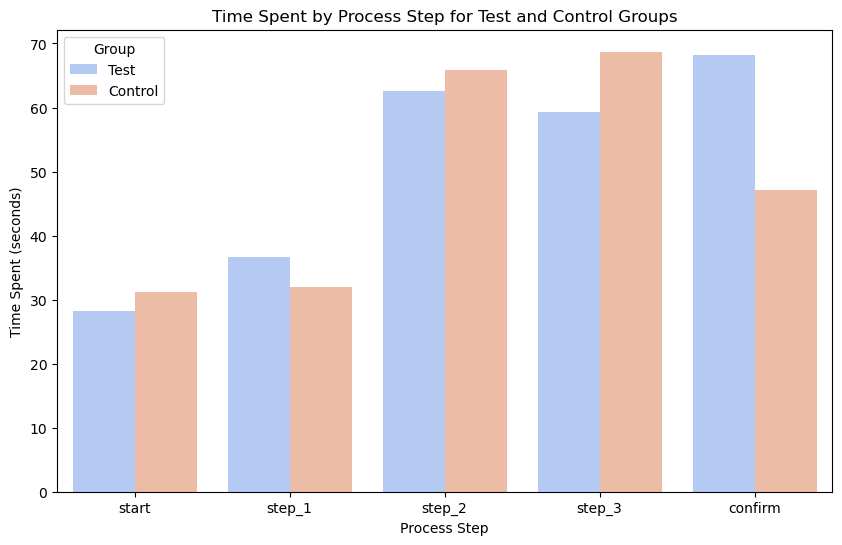

In [524]:
# Create a side-by-side bar plot
mean_control['Group'] = 'Control'
mean_test['Group'] = 'Test'
combined_df = pd.concat([mean_test, mean_control])

order = ['start','step_1', 'step_2', 'step_3','confirm']


plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='process_step', y='time_spent_seconds', hue='Group', palette='coolwarm', order = order)

plt.title('Time Spent by Process Step for Test and Control Groups')
plt.xlabel('Process Step')
plt.ylabel('Time Spent (seconds)')


plt.legend(title='Group')
plt.show()

There is a statistically significant difference between the test and control groups for time spent, but they are practically very small differences, except for the last step where the control group spent significantly less time. At the start, at step 2 and step 3 the test group fared better, but at step 1 and the confirm step the control group needed less time. Overall a mixed result.

## HYPOTHESIS TESTING

H0: The updated design did not improve the completion rate

H1: The updated design led to a higher completion rate

Significance level (α): 0.05



In [528]:
# Completion Rate for control and test group by client_id：

total_users_control =df_control['client_id'].nunique()
cfm_user_control = df_control[df_control['process_step']=='confirm']['client_id'].nunique()
completion_rate_control = round((cfm_user_control/total_users_control)*100,2)
print(f"completion rate for control group customer is:{completion_rate_control}%")

total_users_test =df_test['client_id'].nunique()
cfm_user_test = df_test[df_test['process_step']=='confirm']['client_id'].nunique()
completion_rate_test = round((cfm_user_test/total_users_control)*100,2)
print(f"completion rate for test group customer is: {completion_rate_test}%")


completion rate for control group customer is:65.58%
completion rate for test group customer is: 79.41%


In [529]:
# Completion Rate for control and test group by visit_id：

total_users_control =df_control['visit_id'].nunique()
cfm_user_control = df_control[df_control['process_step']=='confirm']['visit_id'].nunique()
completion_rate_control = round((cfm_user_control/total_users_control)*100,2)
print(f"completion rate for control group customer is:{completion_rate_control}%")

total_users_test =df_test['visit_id'].nunique()
cfm_user_test = df_test[df_test['process_step']=='confirm']['visit_id'].nunique()
completion_rate_test = round((cfm_user_test/total_users_control)*100,2)
print(f"completion rate for test group customer is: {completion_rate_test}%")


completion rate for control group customer is:49.84%
completion rate for test group customer is: 67.51%


In [530]:
# Number of users who completed the process (confirm) in control and test groups
cfm_user_control = df_control[df_control['process_step'] == 'confirm']['visit_id'].nunique()
cfm_user_test = df_test[df_test['process_step'] == 'confirm']['visit_id'].nunique()

# Total number of users in control and test groups
total_users_control = df_control['visit_id'].nunique()
total_users_test = df_test['visit_id'].nunique()

# Number of successes (confirmed users) for both groups
successes = [cfm_user_control, cfm_user_test]

# Number of total users in both groups
nobs = [total_users_control, total_users_test]

# Perform the z-test for proportions
test_stat, p_value = proportions_ztest(successes, nobs)

print(f"Z-statistic: {test_stat}")
print(f"P-value: {p_value}")

Z-statistic: -22.89350661920664
P-value: 5.392475122751858e-116


We reject the null-hypothesis (p-Value < 0.05, z_value more than 3 std away from the expected mean when H0 = true)

Threshold: Vanguard has set this minimum increase in completion rate at 5%. This is the rate at which the projected benefits, in terms of increased user engagement and potential revenue, are estimated to outweigh the costs of the new design.


You are required to carry out another analysis, ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold. If the new design doesn’t lead to at least this level of improvement, it may not be justifiable from a cost perspective, regardless of its statistical significance%

H0 : The new update did not result in an increas in completion rate of at least 5%.

H1 : The new update did result in an increase in completion rate of at least 5%.

completion rate for control group customer is: 49.84%

completion rate for test group customer is: 67.51%

In [534]:
#completion rate increase: 
x = 67.51 - 49.84
comp_rate_increase = x/49.84*100
comp_rate_increase

35.45345104333869

The completion rate increase is around 35.45 percent which is significantly more than 5%, meaning the new design is justifiable from a cost perspective.

In [536]:
df_control['age'].describe()

count   140,482.0000
mean         48.2863
std          15.6251
min          17.0000
25%          34.0000
50%          50.0000
75%          60.0000
max          96.0000
Name: age, dtype: Float64

In [537]:
df_test['age'].describe()

count   176,641.0000
mean         48.7289
std          15.6516
min          17.0000
25%          35.0000
50%          50.0000
75%          61.0000
max          96.0000
Name: age, dtype: Float64

In [538]:
df_control['tenure_years'].describe()

count   140,482.0000
mean         12.1678
std           6.9809
min           2.0000
25%           6.0000
50%          11.0000
75%          16.0000
max          55.0000
Name: tenure_years, dtype: Float64

In [539]:
df_test['tenure_years'].describe()

count   176,641.0000
mean         12.1820
std           6.9405
min           2.0000
25%           6.0000
50%          11.0000
75%          16.0000
max          55.0000
Name: tenure_years, dtype: Float64

In [540]:
df_control['gender'].value_counts()

gender
Unknown    48438
M          47415
F          44629
Name: count, dtype: int64

In [541]:
df_test['gender'].value_counts()

gender
M          59288
Unknown    59184
F          58169
Name: count, dtype: int64

In [542]:
# Bluce 10-12 added:  

# Design Effectiveness
# Was the experiment well-structured?
# Were clients randomly and equally divided between the old and new designs?
# Were there any biases?

# 1-both test and control group have the same data structure (same column names/ same value type per column) 
# 2- both groups had large and similar data size (test group 176699 rows/control group：140536 rows) 

# we collect all main key columns('gender','tenure_years','age', 'acct_balance','num_accts','calls_6_mnth','logons_6_mnth')  to test if any column 
# has distribution bias between test and control group
# here we first test the category column 'gender' by Chi-square


# H0: gender column are equally distributed 
# H1: gender column are not equally distributed 

gender_counts_control = df_control['gender'].value_counts()
gender_counts_test = df_test['gender'].value_counts()
contingency_table = pd.DataFrame({'Control': gender_counts_control, 'Test': gender_counts_test}).fillna(0)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test statistic: {chi2}")
print(f"P-value for gender distribution: {p} means it right to support H1: gender column are not equally distributed ")

# then we further cross check above hypothesis for each gendr's percentage in both group and get contradictory result:
# Control group : unknown 34.48%/ Male:33.75%/ Female:31.77% ///Test group : unknown33.51%/ Male:33.56%/ Female:32.93%
# Very likely caused by a huge sample size which magnifies the minor differences in distribution in statistic

print(df_control['gender'].value_counts(normalize=True)*100)
print(df_test['gender'].value_counts(normalize=True)*100)

# After conbining above 2 cross-check results, we make our conclusion: gender distribution between 2 group is not bias.


Chi-square test statistic: 55.32225917513208
P-value for gender distribution: 9.703402734413563e-13 means it right to support H1: gender column are not equally distributed 
gender
Unknown   34.4799
M         33.7517
F         31.7685
Name: proportion, dtype: float64
gender
M         33.5641
Unknown   33.5052
F         32.9306
Name: proportion, dtype: float64


In [543]:
# Gender counts for Control and Test groups
gender_counts_control = df_control['gender'].value_counts()
gender_counts_test = df_test['gender'].value_counts()

# Total sample sizes for Control and Test groups
n_control = len(df_control)
n_test = len(df_test)

# Perform z-test for each gender category
for gender in ['M', 'F', 'Unknown']:
    count_control = gender_counts_control.get(gender, 0)
    count_test = gender_counts_test.get(gender, 0)
    
    # Combine the counts and sample sizes
    counts = np.array([count_control, count_test])
    nobs = np.array([n_control, n_test])
    

    z_stat, p_value = proportions_ztest(counts, nobs)
    
    print(f"Gender: {gender}")
    print(f"Z-statistic: {z_stat:.4f}, P-value: {p_value}\n")


Gender: M
Z-statistic: 1.1102, P-value: 0.26689563442868236

Gender: F
Z-statistic: -6.9455, P-value: 3.771185338179258e-12

Gender: Unknown
Z-statistic: 5.7579, P-value: 8.519157627533685e-09



Let's calculate **Cohen's h**, which is a common way to measure the **effect size** for comparing two proportions. It will help determine whether the differences in gender proportions are not only statistically significant but also practically significant.

### Formula for Cohen's h:

The formula for Cohen's h is:

$$
h = 2 \times \left( \arcsin \left( \sqrt{p_1} \right) - \arcsin \left( \sqrt{p_2} \right) \right)
$$

Where:
- \( p_1 \) is the proportion in the control group,
- \( p_2 \) is the proportion in the test group.

### Cohen's h Interpretation:
- **0.2**: Small effect size
- **0.5**: Medium effect size
- **0.8**: Large effect size

We can now calculate Cohen's h for each gender category to see how large or small the differences a
This will give you Cohen's h for each gender category, which will help assess the practical significance of the differenn practical terms.


In [545]:
def cohen_h(p1, p2):
    """Calculate Cohen's h for two proportions."""
    return 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))

# Proportions for each gender in control and test groups
proportions_control = gender_counts_control / n_control
proportions_test = gender_counts_test / n_test

# Calculate Cohen's h for each gender category
for gender in ['M', 'F', 'Unknown']:
    p1 = proportions_control.get(gender, 0)
    p2 = proportions_test.get(gender, 0)
    
    h = cohen_h(p1, p2)
    print(f"Gender: {gender}, Cohen's h: {h:.4f}")


Gender: M, Cohen's h: 0.0040
Gender: F, Cohen's h: -0.0248
Gender: Unknown, Cohen's h: 0.0206


In the context of Cohen's h for proportions, the sign of the value (positive or negative) indicates the direction of the difference between the two proportions, but the magnitude (absolute value) tells you the effect size.

Interpretation of the results:
Positive Cohen's h: The proportion in the test group is larger than in the control group.
Negative Cohen's h: The proportion in the test group is smaller than in the control group.


M (Male): Cohen's h = 0.0040

This is a very small positive value, indicating that the male proportion in the test group is slightly larger than in the control group, but the difference is tiny (almost negligible).


F (Female): Cohen's h = -0.0248

This small negative value means the female proportion in the test group is slightly smaller than in the control group. Again, the difference is very small.


Unknown: Cohen's h = 0.0206

This small positive value means the proportion of "Unknown" gender is slightly larger in the test group compared to the control group, but still very minor.


Practical Significance:

All values of Cohen's h are below 0.2, meaning these differences are very small and not practically significant.
In summary, even though some of the proportions are statistically significantly different (as indicated by the p-values), the effect size (Cohen's h) shows that the differences are practically very minor, and likely not meaningful in a real-world context.

In [547]:
df_control

,client_id,visitor_id,visit_id,process_step,date_time,Variation,tenure_years,tenure_months,age,gender,num_accts,acct_balance,calls_6_mnth,logons_6_mnth,age_binned,step_order,errors
98080,105007,676020267_36602664238,100030127_47967100085_936361,start,2017-03-22 11:07:49,Control,9,118,35,F,2,"34,897.4700",3,6,35-40,0,False
11264,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:41:51,Control,16,202,78,M,2,"146,827.1400",5,8,75-80,0,False
11263,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:43:16,Control,16,202,78,M,2,"146,827.1400",5,8,75-80,0,False
11262,5623007,700426174_33289797318,100037962_47432393712_705583,step_1,2017-04-14 16:43:55,Control,16,202,78,M,2,"146,827.1400",5,8,75-80,1,False
11261,5623007,700426174_33289797318,100037962_47432393712_705583,start,2017-04-14 16:44:03,Control,16,202,78,M,2,"146,827.1400",5,8,75-80,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38038,4064969,110735946_42614968419,999985675_64610694964_443659,start,2017-04-20 09:45:18,Control,6,75,64,Unknown,2,"74,783.7600",5,8,60-65,0,False
38037,4064969,110735946_42614968419,999985675_64610694964_443659,step_1,2017-04-20 09:46:26,Control,6,75,64,Unknown,2,"74,783.7600",5,8,60-65,1,False
38036,4064969,110735946_42614968419,999985675_64610694964_443659,step_2,2017-04-20 09:47:04,Control,6,75,64,Unknown,2,"74,783.7600",5,8,60-65,2,False
38035,4064969,110735946_42614968419,999985675_64610694964_443659,step_3,2017-04-20 09:48:45,Control,6,75,64,Unknown,2,"74,783.7600",5,8,60-65,3,False


In [548]:
# here we use T-test hypothesis to check if any of the below key continuous data columns has a distribution bias between test VS control group
# tested columns ":tenure_years','age', 'acct_balance','num_accts','calls_6_mnth','logons_6_mnth' 

# H0: each one of them are equally distributed 
# H1: each one of them are not equally distributed 

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_control['tenure_years'],df_test['tenure_years'],equal_var=False)
print(f" column clnt_tenure_yr t_stat:{t_stat}, p value:{p_value:.10f}")
print (f"above get p value =0.56 which means we fail to reject HO hypothsis,so this column is truely equally distributed")

t_stat, p_value = ttest_ind(df_control['age'],df_test['age'],equal_var=False)
print(f" column clnt_age t_stat:{t_stat}, p value:{p_value:.10f}")
# result: p_value <0.01

t_stat, p_value = ttest_ind(df_control['acct_balance'],df_test['acct_balance'],equal_var=False)
print(f" column bal t_stat:{t_stat}, p value:{p_value:.10f}")
# result: p_value <0.01

t_stat, p_value = ttest_ind(df_control['num_accts'],df_test['num_accts'],equal_var=False)
print(f" column num_accts:{t_stat}, p value:{p_value:.10f}")
# result: p_value <0.01

t_stat, p_value = ttest_ind(df_control['calls_6_mnth'],df_test['calls_6_mnth'],equal_var=False)
print(f" column calls_6_mnth:{t_stat}, p value:{p_value:.10f}")
# result: p_value <0.01

t_stat, p_value = ttest_ind(df_control['logons_6_mnth'],df_test['logons_6_mnth'],equal_var=False)
print(f" column logons_6_mnth:{t_stat}, p value:{p_value:.10f}")
# result: p_value <0.01
print("------------------------")

# for all above 5 columns which statistic P-value < 0.01 we are here to further check if bias distributed by compare each distinct value's percentage in each group:
# below are general date to refer to

#  column name:             value range                gap   
# 'num_accts':              2-7
# 'calls_6_mnth':           0-6l
# 'logons_6_mnth':          3-9  
# 'age' :              17-96                      79
# 'acct_balance':                    23,789.61-- 8,292,996.21   8269207

columns = ['num_accts','calls_6_mnth','logons_6_mnth']

for col in columns:
    control_counts = df_control[col].value_counts(normalize=True) * 100
    control_counts = control_counts.rename("control_percentage").reset_index()
    control_counts = control_counts.rename(columns={"index": col})
    test_counts = df_test[col].value_counts(normalize=True) * 100
    test_counts = test_counts.rename("test_percentage").reset_index()
    test_counts = test_counts.rename(columns={"index": col})
    combine_test_control_df = pd.merge(control_counts, test_counts, on=col, how='outer').fillna(0)
    print(f" percentage comparison for {col}")
    print(combine_test_control_df)
    print("------------------------")
  

# here continue check column 'clnt_age' if bias:
control_age_groups = pd.cut(df_control['age'], bins=[17, 29, 39, 49, 59, 69, 79], labels=['17-29', '30-39', '40-49', '50-59', '60-69', '70-79'])
test_age_groups = pd.cut(df_test['age'], bins=[17, 29, 39, 49, 59, 69, 79], labels=['17-29', '30-39', '40-49', '50-59', '60-69', '70-79'])

control_age_counts = control_age_groups.value_counts(normalize=True) * 100
control_age_counts = control_age_counts.rename("control_percentage").reset_index()
control_age_counts = control_age_counts.rename(columns={"index": "age_group"})
test_age_counts = test_age_groups.value_counts(normalize=True) * 100
test_age_counts = test_age_counts.rename("test_percentage").reset_index()
test_age_counts = test_age_counts.rename(columns={"index": "age_group"})
clnt_age_test_control_df = pd.merge(control_age_counts, test_age_counts, on="age",how='outer')
clnt_age_test_control_df


# here continue check column 'bal' if bias:
control_bal_groups = pd.cut(df_control['acct_balance'], 
                            bins=[20000, 50000, 100000, 200000, 300000, 500000,1000000,9000000],
                            labels=['20000-50000', '50001-100000', '100001-200000', '200001-300000', '300001-500000', '500001-1000000','1000001-9000000'])

test_bal_groups = pd.cut(df_test['acct_balance'], 
                            bins=[20000, 50000, 100000, 200000, 300000, 500000,1000000,9000000],
                            labels=['20000-50000', '50001-100000', '100001-200000', '200001-300000', '300001-500000', '500001-1000000','1000001-9000000'])

control_bal_counts = control_bal_groups.value_counts(normalize=True) * 100
control_bal_counts = control_bal_counts.rename("control_percentage").reset_index()
control_bal_counts = control_bal_counts.rename(columns={"index": "bal_group"})

test_bal_counts = test_bal_groups.value_counts(normalize=True) * 100
test_bal_counts = test_bal_counts.rename("test_percentage").reset_index()
test_bal_counts = test_bal_counts.rename(columns={"index": "bal_group"})
test_bal_counts

bal_test_control_df = pd.merge(control_bal_counts, test_bal_counts, on="acct_balance",how='outer')
bal_test_control_df

# All above futher check result shows in all key columns('gender','tenure_years','age', 'acct_balance','num_accts','calls_6_mnth','logons_6_mnth') 
# each distinct value's percentage gap between test VS control group are all less than 2% ,so we finally conclude : none of them is bias distributed. 





 column clnt_tenure_yr t_stat:-0.5717054461497606, p value:0.5675219718
above get p value =0.56 which means we fail to reject HO hypothsis,so this column is truely equally distributed
 column clnt_age t_stat:-7.9184455279043275, p value:0.0000000000
 column bal t_stat:-2.8799441980709295, p value:0.0039777221
 column num_accts:9.785061013095596, p value:0.0000000000
 column calls_6_mnth:8.385581204059461, p value:0.0000000000
 column logons_6_mnth:7.88951995152365, p value:0.0000000000
------------------------
 percentage comparison for num_accts
   num_accts  control_percentage  test_percentage
0          1              0.0000           0.0028
1          2             77.2661          78.7037
2          3             18.8465          17.7201
3          4              3.3150           3.1539
4          5              0.5154           0.3493
5          6              0.0399           0.0549
6          7              0.0171           0.0153
------------------------
 percentage comparison

,acct_balance,control_percentage,test_percentage
0,20000-50000,34.9967,34.9055
1,50001-100000,28.3595,28.0283
2,100001-200000,18.0130,17.9241
3,200001-300000,6.5489,7.0409
4,300001-500000,5.9993,6.0143
5,500001-1000000,4.1934,4.2296
6,1000001-9000000,1.8892,1.8572


In [549]:

def cohen_d(control, test):
    # Calculate the means
    mean_control = np.mean(control)
    mean_test = np.mean(test)
    
    # Calculate the standard deviations
    std_control = np.std(control, ddof=1)  # ddof=1 for sample standard deviation
    std_test = np.std(test, ddof=1)
    
    # Calculate the number of observations in each group
    n_control = len(control)
    n_test = len(test)
    
    # Calculate the pooled standard deviation
    pooled_std = np.sqrt(((n_control - 1) * std_control**2 + (n_test - 1) * std_test**2) / (n_control + n_test - 2))
    
    # Calculate Cohen's d
    d = (mean_control - mean_test) / pooled_std
    
    return d

# Columns to calculate Cohen's d for
columns = ['tenure_years', 'age', 'acct_balance', 'num_accts', 'calls_6_mnth', 'logons_6_mnth']

for col in columns:
    # Ensure the values are numeric and remove any NaN values
    control_data = pd.to_numeric(df_control[col], errors='coerce').dropna()
    test_data = pd.to_numeric(df_test[col], errors='coerce').dropna()
    
    # Calculate Cohen's d
    d_value = cohen_d(control_data, test_data)
    
    print(f"Cohen's d for {col}: {d_value:.4f}")


Cohen's d for tenure_years: -0.0020
Cohen's d for age: -0.0283
Cohen's d for acct_balance: -0.0101
Cohen's d for num_accts: 0.0351
Cohen's d for calls_6_mnth: 0.0300
Cohen's d for logons_6_mnth: 0.0282


From this output, you can see that while the differences were statistically significant from their p-values, the Cohen's d value for the columns is small, suggesting that the difference between the control and test groups is minimal in terms of effect size.

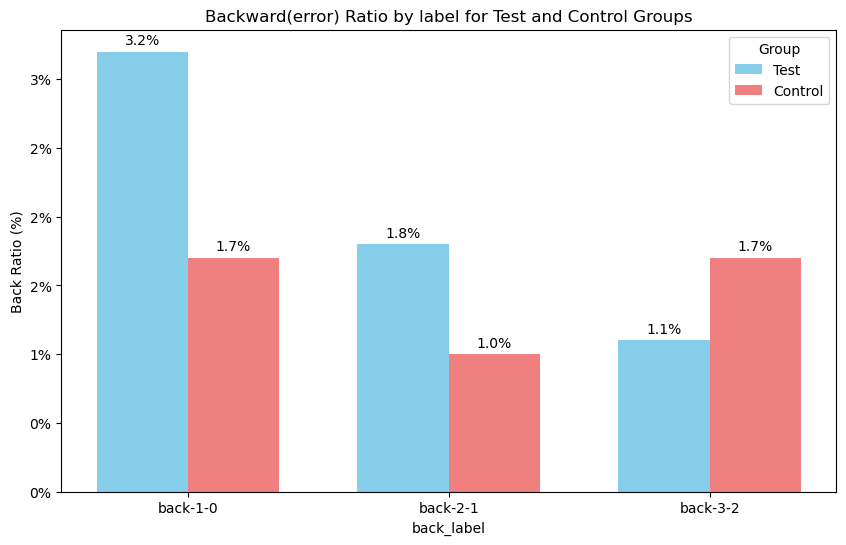

In [551]:
# bluce 10-16 added for bonus task:
# How do clients navigate through the old versus the new digital process? Do they follow similar steps or diverge at certain points?

# in control group classify each backward(error) type (eg: back-2-1 means click from step_2 to step_1) and calculate percentage in all backward times
df_sorted_control = df_control_timesort_no_outliers.sort_values(by=['visit_id', 'date_time'])
correct_order = ['start','step_1', 'step_2', 'step_3','confirm']

# fill new column['prev_step'] data with ['process_step'] shift down 1 row
df_sorted_control['prev_step'] = df_sorted_control.groupby('visit_id')['process_step'].shift(1)
df_sorted_control['is_back'] = df_sorted_control.apply(lambda x: correct_order.index(x['prev_step']) > correct_order.index(x['process_step']) if x['prev_step'] in correct_order and x['process_step'] in correct_order else False,axis=1)

# define each backward operation 
def define_back_label(row):
    if row['prev_step']=='step_1' and row['process_step']=='start':
        return 'back-1-0'
    elif row['prev_step'] == 'step_2' and row['process_step']=='step_1':
        return 'back-2-1'
    elif row['prev_step'] == 'step_3' and row['process_step']=='step_2':
        return 'back-3-2'
    return None
    
# insert column to store above classify statistics
df_sorted_control['back_label'] = df_sorted_control.apply(define_back_label,axis = 1)
back_counts_control = df_sorted_control['back_label'].value_counts()
all_steps_control = df_sorted_control.shape[0]
back_ratio_control = (back_counts_control/all_steps_control*100).round(1).astype(str) + '%'
result_control = pd.DataFrame({'back_count_control':back_counts_control,'back_ratio_control':back_ratio_control})


# above same calculate on test group 

df_sorted_test = df_test_timesort_no_outliers.sort_values(by=['visit_id', 'date_time'])

# fill new column['prev_step'] data with ['process_step'] shift down 1 row
df_sorted_test['prev_step'] = df_sorted_test.groupby('visit_id')['process_step'].shift(1)
df_sorted_test['is_back'] = df_sorted_test.apply(lambda x: correct_order.index(x['prev_step']) > correct_order.index(x['process_step']) if x['prev_step'] in correct_order and x['process_step'] in correct_order else False,axis=1)

# insert column to store above classify statistics
df_sorted_test['back_label'] = df_sorted_test.apply(define_back_label,axis = 1)
back_counts_test = df_sorted_test['back_label'].value_counts()
all_steps_test = df_sorted_test.shape[0]
back_ratio_test = (back_counts_test/all_steps_test*100).round(1).astype(str) + '%'
result_test = pd.DataFrame({'back_count_test':back_counts_test,'back_ratio_test':back_ratio_test})

df_combined_bonus = pd.merge(result_test,result_control,on ='back_label', how='outer')
df_combined_bonus


#visualize above backward (error) rate between control and test group

import numpy as np
import matplotlib.pyplot as plt

df_combined_bonus['back_ratio_test'] = df_combined_bonus['back_ratio_test'].str.rstrip('%').astype('float') / 100.0
df_combined_bonus['back_ratio_control'] = df_combined_bonus['back_ratio_control'].str.rstrip('%').astype('float') / 100.0

labels = df_combined_bonus.index.tolist()  
x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(x - width/2, df_combined_bonus['back_ratio_test'], width, label='Test', color='skyblue')
bar2 = ax.bar(x + width/2, df_combined_bonus['back_ratio_control'], width, label='Control', color='lightcoral')

ax.set_xlabel('back_label')
ax.set_ylabel('Back Ratio (%)')
ax.set_title('Backward(error) Ratio by label for Test and Control Groups')
ax.set_xticks(x)  
ax.set_xticklabels(labels) 
ax.legend(title='Group')  

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1%}',  
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}%'.format(x * 100)))

plt.show()


## CREATING A COMPREHENSIVE DATAFRAME WITH EVERYTHING FOR TABLEAU

In [554]:
df_all

,client_id,visitor_id,visit_id,process_step,date_time,Variation,tenure_years,tenure_months,age,gender,num_accts,acct_balance,calls_6_mnth,logons_6_mnth,age_binned
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test,5,64,79,Unknown,2,"189,023.8600",1,4,75-80
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test,5,64,79,Unknown,2,"189,023.8600",1,4,75-80
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test,5,64,79,Unknown,2,"189,023.8600",1,4,75-80
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test,5,64,79,Unknown,2,"189,023.8600",1,4,75-80
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test,5,64,79,Unknown,2,"189,023.8600",1,4,75-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317118,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test,10,121,55,Unknown,2,"153,238.8300",3,6,55-60
317119,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control,21,252,34,M,3,"141,808.0500",6,9,30-35
317120,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control,21,252,34,M,3,"141,808.0500",6,9,30-35
317121,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control,21,252,34,M,3,"141,808.0500",6,9,30-35


In [555]:
df_all['date_time'] = pd.to_datetime(df_all['date_time'])

In [556]:
df_all_timesort = df_all.sort_values(by=['visit_id', 'date_time'])

df_all_timesort['time_diff_seconds'] = df_all_timesort.groupby('visit_id')['date_time'].diff().dt.total_seconds()

df_all_timesort['time_spent_seconds'] = df_all_timesort['time_diff_seconds'].shift(-1)

column_to_move = df_all_timesort.pop('time_spent_seconds')
df_all_timesort.insert(5, 'time_spent_seconds', column_to_move)

df_all_timesort_no_outliers = tukeys_test_outliers(df_all_timesort,'time_spent_seconds', method = 'delete')

In [558]:

df_all_timesort_no_outliers['date_time'] = pd.to_datetime(df_all_timesort_no_outliers['date_time'])
step_orde_dict ={0:'start',1:'step_1',2:'step_2',3:'step_3',4:'confirm'}
reverse_step_orde_dict = {value:key for key,value in step_orde_dict.items()}

# Assuming df_test and reverse_step_orde_dict are defined as before
df_all_timesort_no_outliers['date_time'] = pd.to_datetime(df_all_timesort_no_outliers['date_time'])

# Map the steps to their numeric order
df_all_timesort_no_outliers['step_order'] = df_all_timesort_no_outliers['process_step'].map(reverse_step_orde_dict)

# Sort the DataFrame by visitor_id and date_time to ensure chronological order of actions
df_all_timesort_no_outliers = df_all_timesort_no_outliers.sort_values(by=['visit_id', 'date_time'])

# Define a function to count the number of errors per visitor (every time a backward step occurs)
# def count_errors(group):
#     return (group['step_order'].diff() < 0).sum()
# Apply the function to count the errors for each visitor

df_all_timesort_no_outliers['errors'] = df_all_timesort_no_outliers.groupby('visit_id')['step_order'].diff() < 0

# Calculate the total number of errors (sum of all the errors across all visitors)
total_errors = df_all_timesort_no_outliers['errors'].sum()

# Calculate the total number of actions (each row is an action)
total_actions = df_all_timesort_no_outliers.shape[0]

# Calculate the error rate as the percentage of errors vs total actions
error_rate = round((total_errors / total_actions) * 100, 2)

# Output the total number of errors and the error rate
print(f"Total errors in all group: {total_errors}")
print(f"Error rate for all group: {error_rate}%")


C:\Users\JimiH\AppData\Local\Temp\ipykernel_16376\1931255251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_timesort_no_outliers['date_time'] = pd.to_datetime(df_all_timesort_no_outliers['date_time'])
C:\Users\JimiH\AppData\Local\Temp\ipykernel_16376\1931255251.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_timesort_no_outliers['date_time'] = pd.to_datetime(df_all_timesort_no_outliers['date_time'])
C:\Users\JimiH\AppData\Local\Temp\ipykernel_16376\1931255251.py:9: SettingWithCopyWarn

Total errors in all group: 23033
Error rate for all group: 7.83%


In [559]:
df_all_timesort_no_outliers

,client_id,visitor_id,visit_id,process_step,date_time,time_spent_seconds,Variation,tenure_years,tenure_months,age,gender,num_accts,acct_balance,calls_6_mnth,logons_6_mnth,age_binned,time_diff_seconds,step_order,errors
106278,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,52.0000,Test,4,56,60,Unknown,2,"63,130.4400",6,9,60-65,NaN,4,False
106277,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,NaN,Test,4,56,60,Unknown,2,"63,130.4400",6,9,60-65,52.0000,4,False
235271,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,16.0000,Test,7,88,24,M,2,"26,436.7300",6,9,20-25,NaN,0,False
235270,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,9.0000,Test,7,88,24,M,2,"26,436.7300",6,9,20-25,16.0000,1,False
235269,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,14.0000,Test,7,88,24,M,2,"26,436.7300",6,9,20-25,9.0000,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95137,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,11.0000,Test,18,227,58,F,2,"1,056,775.5400",6,9,55-60,NaN,0,False
95136,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,54.0000,Test,18,227,58,F,2,"1,056,775.5400",6,9,55-60,11.0000,1,False
95135,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,44.0000,Test,18,227,58,F,2,"1,056,775.5400",6,9,55-60,54.0000,2,False
95134,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,9.0000,Test,18,227,58,F,2,"1,056,775.5400",6,9,55-60,44.0000,1,True


In [560]:
df_all_timesort_no_outliers["Variation"].value_counts()

Variation
Test       163745
Control    130475
Name: count, dtype: int64

In [561]:
df_tableau = df_all_timesort_no_outliers

In [562]:
df_tableau.dtypes

client_id                      int64
visitor_id                    object
visit_id                      object
process_step                  object
date_time             datetime64[ns]
time_spent_seconds           float64
Variation                     object
tenure_years                   Int64
tenure_months                  Int64
age                            Int64
gender                        object
num_accts                      Int64
acct_balance                 float64
calls_6_mnth                   Int64
logons_6_mnth                  Int64
age_binned                  category
time_diff_seconds            float64
step_order                     int64
errors                          bool
dtype: object

In [563]:
df_tableau_index = df_tableau.reset_index(drop = True)

In [564]:
pd.options.display.float_format = '{:.2f}'.format

In [686]:
df_tableau_index['acct_balance'].sort_values()

81275       23789.44
81273       23789.44
81274       23789.44
81276       23789.44
176247      23789.49
             ...    
175069   16320040.15
4685     16320040.15
4686     16320040.15
40688    16320040.15
172975   16320040.15
Name: acct_balance, Length: 294220, dtype: float64

In [690]:
df_tableau_index['acct_balance'] = df_tableau_index['acct_balance'].round(2)

In [ ]:
df_tableau_index.dtypes

In [ ]:
df_tableau_index.isnull().sum()

In [696]:
df_tableau_index.to_csv('df_tableau_index_semicolon.csv', sep=';', index=False)
